**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [34]:
# python3.6
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import scipy
# %load_ext pycodestyle_magic

In [41]:
# %%pycodestyle


class MyKNeighborsClassifier(
    NeighborsBase,
    KNeighborsMixin,
    SupervisedIntegerMixin,
    ClassifierMixin
):

    def __init__(self, n_neighbors=5):
        self.k = n_neighbors
        self.predict_data = None
        self.predict_class = None
        self.classes_numb = None

    def fit(self, x, y):
        self.predict_data = np.array(x, dtype=np.)
        self.predict_class = np.int8(y)
        self.classes_numb = np.unique(self.predict_class).shape[0]

    def predict(self, x):

        # classes of the nearest rows from
        # predict_data to X rows (shape: (X.shape[0], k))
        neigh_classes = self._neighbors_classes(x)
        res = np.empty((x.shape[0],), dtype=np.uint8)

        for i in range(x.shape[0]):
            res[i] = np.argmax(np.bincount(neigh_classes[i]))
        return res

    def predict_proba(self, x):

        # classes of the nearest rows from
        # predict_data to X rows (shape: (X.shape[0], k))
        neigh_classes = self._neighbors_classes(x)
        res = np.zeros((x.shape[0], self.classes_numb), dtype=np.float32)
        for i in range(x.shape[0]):
            counts = np.bincount(neigh_classes[i])
            res[i, :counts.size] = counts

        res /= self.k
        return res

    def score(self, x, y):
        tmp = self.predict(x)
        mistakes = np.sum(np.bincount(np.int8(np.abs(tmp - y)))[1:])
        return 1.0 - mistakes / y.shape[0]

    def _neighbors_classes(self, data):
        neighbors_classes = np.empty((data.shape[0],
                                      self.k), dtype=np.uint8)
        for i in range(data.shape[0]):
            neighbors_classes[i] = self.predict_class[
                np.argpartition(
                    ((np.array(data[i] - self.predict_data,
                               dtype=np.float32)) ** 2).sum(axis=1),
                    np.arange(self.k))[:self.k]
            ]
        return neighbors_classes

**IRIS**

In [12]:
iris = datasets.load_iris()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [14]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [15]:
%time clf.fit(X_train, y_train)

CPU times: user 3.33 ms, sys: 5.87 ms, total: 9.21 ms
Wall time: 374 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [16]:
%time my_clf.fit(X_train, y_train)

CPU times: user 752 µs, sys: 448 µs, total: 1.2 ms
Wall time: 22.6 ms


In [17]:
%time clf.predict(X_test)

CPU times: user 1.81 ms, sys: 0 ns, total: 1.81 ms
Wall time: 9.18 ms


array([2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0])

In [18]:
%time my_clf.predict(X_test)

CPU times: user 985 µs, sys: 588 µs, total: 1.57 ms
Wall time: 995 µs


array([2, 1, 0, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0], dtype=uint8)

In [19]:
%time clf.predict_proba(X_test)

CPU times: user 2.87 ms, sys: 1.72 ms, total: 4.59 ms
Wall time: 153 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [20]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.26 ms, sys: 753 µs, total: 2.01 ms
Wall time: 101 ms


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [21]:
clf.score(X_test, y_test)

0.9333333333333333

In [22]:
my_clf.score(X_test, y_test)

0.9333333333333333

19 - optimal n_neighbors value


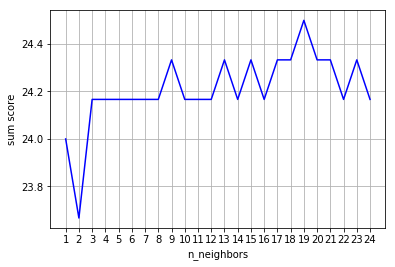

In [44]:
# %%pycodestyle
# Задание 3

max_n_neighbors = 25
neighbors = range(1, max_n_neighbors)
iris = datasets.load_iris()
sum_score = [0.0 for _ in neighbors]
for i in neighbors:
    # MyKNeighborsClassifier don't work because of cross validation features
    # (all cells work, but here are some strange errors)
    clf = KNeighborsClassifier(n_neighbors=i)
    sum_score[i - 1] = cross_val_score(clf, iris.data,
                                       iris.target, cv=25).sum()
# plot stuff
plt.xticks(neighbors)
plt.ylabel('sum score')
plt.xlabel('n_neighbors')
plt.grid(b=True, axis='both')
plt.plot(neighbors, sum_score, color='blue', label='test')
print(np.argmax(np.array(sum_score)) + 1, '- optimal n_neighbors value')

**MNIST**

In [23]:
mnist = fetch_mldata('MNIST original')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [25]:
 clf = KNeighborsClassifier(n_neighbors=2)
 my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [26]:
%time clf.fit(X_train, y_train)

CPU times: user 45.8 s, sys: 196 ms, total: 46 s
Wall time: 46 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [27]:
%time my_clf.fit(X_train, y_train)

CPU times: user 28.9 ms, sys: 48.2 ms, total: 77.1 ms
Wall time: 76.1 ms


In [30]:
%time clf.predict(X_test)

CPU times: user 12min 35s, sys: 361 ms, total: 12min 35s
Wall time: 12min 36s


array([1., 9., 8., ..., 3., 1., 5.])

In [29]:
%time my_clf.predict(X_test)

CPU times: user 18min 59s, sys: 15min 55s, total: 34min 55s
Wall time: 35min 15s


array([1, 9, 8, ..., 3, 1, 5], dtype=uint8)

In [32]:
%time clf.predict_proba(X_test)

CPU times: user 13min 52s, sys: 307 ms, total: 13min 52s
Wall time: 13min 53s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [31]:
%time my_clf.predict_proba(X_test)

CPU times: user 20min 11s, sys: 16min 53s, total: 37min 4s
Wall time: 37min 8s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [33]:
clf.score(X_test, y_test)

0.9675714285714285

In [28]:
my_clf.score(X_test, y_test)

0.9675714285714285

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных, основанная на matplotlib.
# Позволяет рисовать понятные статистические графики

# matplotlib - библиотека для рисования 2D графиков, позволяет рисовать
# статичные и интерактивные графики, работающие на разных платформах

# train_test_split - разбивает 2 матрицы (данные и результат) случайно
# на train и test части. Размеры частей можно указать.

# %load_extPipeline (from sklearn.pipeline import Pipeline) - 
# инструмент sklearn, который позволяет создавать "конвейер" 
# операций с данными и проводить финальную оценку работы.
# Один и тот же Pipeline можно применять много раз к разным данным. 

# StandardScaler (from sklearn.preprocessing import StandardScaler) -
# "стандартизирует" распределение признака так, что его 
# математическое ожидание становится = 0, а дисперсия  = 1

# ClassifierMixin - миксин (класс, использующийся для
# добавления функциональности в другие классы, не являтся базовым,
# уменьшает дублирование кода) для всех классификаторов sklearn.
# В данном миксине описан метод score

# NeighborsBase - базовый класс для оценочных функций, оценивающих
# работу инструментов, осонованных на алгоритме
# "ближайших соседей"

# KNeighborsMixin - миксин для поиска к ближайших соседей
# SupervisedIntegerMixin - миксин для работы с классификацией
# по конечному набору целых чисел